In [82]:
# Import needed packages for analysis
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import cfl.util.brain_util as BU
import cfl.util.brain_vis as BV

from cfl.util import fear_mice_functions as fm


mri_dir, mri_dims, affine, dir_labels = fm.get_global_values()

# load response data
Y = pd.read_pickle('Y.pkl')

In [83]:
data_id = 'smooth_X_'
folder_path = os.path.join('npy_files', 'smooth')

# Run PCA on all the Fear MRIs  

In [84]:
# PCA steps from https://datasciencesamurai.com/step-by-step-principal-component-analysis-pca-python/

In [85]:
# load X data 
X = np.load('smooth_X_paper_sigma.npy')

# take out pre-fear and fear data 
timepoints_dir = fm.timepoint_indices_dir(Y)

# do a round for all genotypes together and then a WT vs KO round 

pref_inds = timepoints_dir['PreF']
fear_inds = timepoints_dir['Fear']
fear_X = X[fear_inds]
pref_X = X[pref_inds]

In [162]:
diffs = fear_X - pref_X 
diff_pca, trans_data = standardize_and_PCA_fit(diffs)

In [165]:
diffs.shape

(20, 2033600)

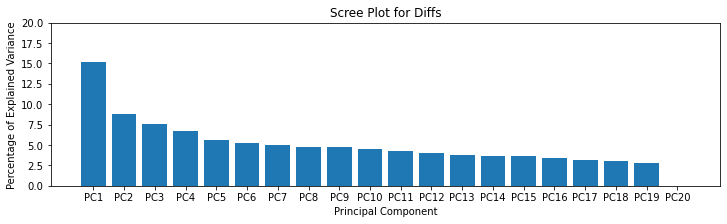

In [163]:
skree_plt(diff_pca, "Diffs")

In [109]:
pref_X.shape

(20, 2033600)

In [87]:
def standardize_and_PCA_fit(X): 
    '''pca is the pca object and xPCA is the transformed data'''
    X_std = StandardScaler().fit_transform(X)
    trained_pca = PCA.fit(X_std)
    fitted_data = pca.transform(X_std)
    return trained_pca, fitted_data

In [110]:
# for PCA: X should be of the shape  (n_samples, n_features)
fear_PCA, fear_PCA_data = standardize_and_PCA_fit(fear_X)
pref_PCA, pref_PCA_data = standardize_and_PCA_fit(pref_X)



In [118]:
def skree_plt(trained_pca, name):
    #The following code constructs the Scree plot
    per_var = np.round(trained_pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    fig = plt.figure(figsize=(12, 3))
    plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.ylim([0, 20])
    plt.xlabel('Principal Component')
    plt.title('Scree Plot for {}'.format(name))
    plt.show()

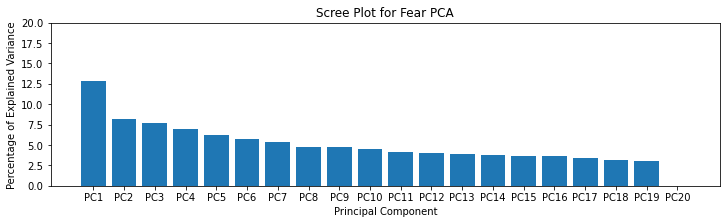

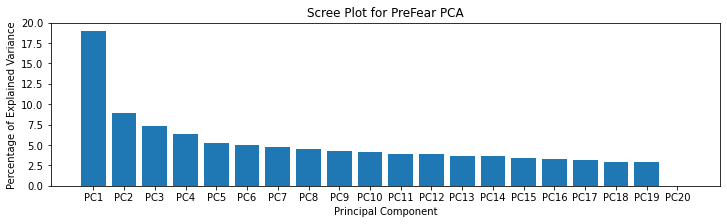

In [119]:
skree_plt(fear_PCA, "Fear PCA")
skree_plt(pref_PCA, "PreFear PCA")

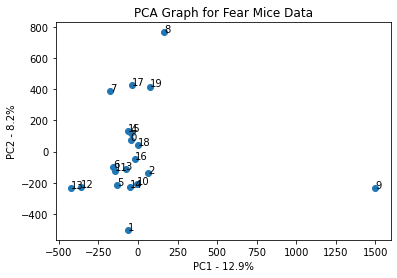

In [122]:
#the following code makes a fancy looking plot using PC1 and PC2


per_var = np.round(fear_PCA.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame(fear_PCA_data, index=[*list(range(20))], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph for Fear Mice Data')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
 

In [125]:
fear_PCA.components_.shape
#components is of the shape (n_components, n_features) 


20

In [138]:
# show me the eigenvector for a given component 
fear_PCA.n_components_

20

In [155]:
# each eigen vector is 1 long 
for i in range(fear_PCA.n_components_): 
    print(np.linalg.norm(fear_PCA.components_[i]))

for i in range(pref_PCA.n_components_): 
    print(np.linalg.norm(pref_PCA.components_[i]))

#so the distance between two perpendicular eigenvectors is ~2 

0.9999999999999999
1.0000000000000004
1.0000000000000004
0.9999999999999988
1.0000000000000007
0.9999999999999996
1.0000000000000016
1.0000000000000002
1.0
0.9999999999999972
0.9999999999999991
1.0000000000000007
0.9999999999999998
1.0000000000000004
0.999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999998
0.9999999999999905
0.9999999999999997
0.9999999999999992
1.0000000000000007
0.9999999999999999
0.999999999999998
1.000000000000001
0.9999999999999998
1.0000000000000002
0.9999999999999994
0.9999999999999997
1.0000000000000004
0.9999999999999998
0.999999999999999
1.0000000000000009
1.0000000000000002
0.9999999999999997
1.0000000000000013
0.9999999999999987
1.000000000000003
1.0000000000000568


In [153]:
# the distance between perpendicular eigenvectors is 2+ (note that all the eigenvectors are normalized to length 1) 
print(np.sum(np.power(fear_PCA.components_[0] - fear_PCA.components_[1], 2)))


# and parallel PCs 
print(np.sum(np.power(fear_PCA.components_[0] - fear_PCA.components_[0], 2)))

2.0000000000000013
0.0


In [144]:
for n in range(fear_PCA.n_components_):
    print(np.sum(np.power(fear_PCA.components_[n] - pref_PCA.components_[n], 2)))

1.5256456654083357
2.226792282757301
1.6925876470518015
1.901299540311873
2.2974960089980203
1.9880812586499559
1.9812328996060886
2.0948515317403884
2.063684611982103
2.010519577429084
1.8027672085256852
2.159666066174049
2.0114480725618935
1.8134441602114992
2.0330371484093424
2.0620517401512535
2.0017749675878216
1.6680816253157678
1.7385425055201624
3.057071838775521


In [156]:
# are the PCs the same or different ?

np.sum(np.not_equal(fear_PCA.components_, pref_PCA.components_), axis=1)

# they are pretty much completely different 

array([1064360, 1064360, 1064360, 1064360, 1064360, 1064360, 1064360,
       1064360, 1064360, 1064360, 1064360, 1064360, 1064360, 1064360,
       1064360, 1064360, 1064360, 1064360, 1064360, 1064360])

In [157]:
np.sum(np.not_equal(fear_X, 0), axis=1)

array([1003277, 1004311,  996429, 1001924, 1002147,  995241,  998978,
        996753, 1006761, 1011832,  983997,  998810,  991121,  979681,
        989254,  995540,  994058,  989650,  994209,  995908])

In [137]:
np.sum(np.not_equal(pref_X, 0), axis=1)

array([ 985728, 1005556,  984931, 1000118,  999833,  990334,  995679,
        999889,  991314, 1001375,  991686,  988769,  981943,  983006,
        989379,  994001,  988502, 1020696,  995168,  997100])

In [158]:
for component1 in fear_PCA.components_: 
    for component2 in pref_PCA.components_: 
        print(np.sum(np.power(component1 - component2, 2)))

1.5256456654083357
2.630496504281299
1.8374464791397944
2.117819992433262
1.8188656400055978
1.9451721059183646
1.9884951134695226
1.968467765415909
2.024480151064766
2.0144061311691037
2.0595348029905076
2.0387087429785935
2.0216397884518984
2.0269914443393233
2.0169092503597743
2.020092547626783
2.0270678531513484
2.0981457050253414
1.987235184312421
1.9999774389737441
1.8561238425372062
2.226792282757301
1.1508965862053078
1.9414556465114299
2.0644728636147027
2.0582850462888027
1.987466010293657
1.9056940835058156
1.9419192177995062
1.9627385406343583
2.067876259088323
2.0010847988403264
2.047156968257488
1.9742145773101127
1.9462215736865867
2.0247317620029777
2.013458376925609
1.943730794876938
1.982888433127931
1.999994726523612
1.8203234947333784
1.1260740909182752
1.6925876470518015
2.0659901109508545
2.028605757969616
2.0081083694359396
2.280209655317475
1.8718795671670623
2.072412428735078
1.9321560388503154
1.9878720398353247
1.9890001213106
1.8865858364232277
2.14515299388

## Try again on Baseline-adjusted data 

In [159]:
def baseline_adj_array(X, Y, timepoint, mri_dims): 
    n_ids = 20
    bl_adj_hm = np.zeros((n_ids, np.prod(mri_dims)))
    for id in range(n_ids): 
        bl_adj_hm[id] = fm.remove_baseline(X, Y, id, timepoint)
    return bl_adj_hm


adj_pref_X = baseline_adj_array(X, Y, 'PreF', mri_dims)
adj_fear_X = baseline_adj_array(X, Y, 'Fear', mri_dims)

In [160]:
fear_PCA = standardize_and_PCA_fit(adj_fear_X)
pref_PCA = standardize_and_PCA_fit(adj_pref_X)


In [161]:
def skree_plt(trained_pca, name):
    #The following code constructs the Scree plot
    per_var = np.round(trained_pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    
    fig = plt.figure(figsize=(12, 3))
    plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.ylim([0, 20])
    plt.xlabel('Principal Component')
    plt.title('Scree Plot for {}'.format(name))
    plt.show()

In [ ]:
#is LDA a good thing to try? 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py